# 3.5 PREPARACIÓN DE DATOS

In [44]:
# 3.5.1 Importación de Bibliotecas
import os
import pandas as pd
import numpy as np

In [46]:
# 3.5.2. Conversion de archivos
paths_xlsx = {
    'Margarita-4':    'GASES_margarita4.xlsx',
    'Mayaya-X1':      'GASES_mayayaX1.xlsx',
    'Margarita-10':   'GASES_margarita10.xlsx',
    'Lliquimuni-X1':  'GASES_lliquimuniX1.xlsx'
}
for pozo, xlsx_path in paths_xlsx.items():
    df_tmp = pd.read_excel(xlsx_path)
    csv_path = xlsx_path.replace('.xlsx', '.csv')
    df_tmp.to_csv(csv_path, index=False)

In [48]:
# 3.5.3. Visualización de los archivos
for pozo, xlsx_path in paths_xlsx.items():
    csv_path = xlsx_path.replace('.xlsx', '.csv')
    df_view = pd.read_csv(csv_path)
    print(f"Primeras filas de {pozo} ({csv_path}):")
    display(df_view.head(), "\n")

Primeras filas de Margarita-4 (GASES_margarita4.csv):


,Depth (m),Total Gas Out 1 (ppm),ChromatographOut_1 C1 (ppm),ChromatographOut_1 C2 (ppm),ChromatographOut_1 C3 (ppm),ChromatographOut_1 iC4 (ppm),ChromatographOut_1 nC4 (ppm),ChromatographOut_1 iC5 (ppm),ChromatographOut_1 nC5 (ppm)
0,4641,21021,15985,1169,352,33,66,16,13
1,4642,31083,24219,1680,465,56,80,24,14
2,4643,38741,30853,1889,496,49,86,32,30
3,4644,25688,19026,1362,399,45,134,25,14
4,4645,31416,23660,1348,403,51,164,20,11


'\n'

Primeras filas de Mayaya-X1 (GASES_mayayaX1.csv):


,Depth (m),Total Gas Out 1 (ppm),ChromatographOut_1 C1 (ppm),ChromatographOut_1 C2 (ppm),ChromatographOut_1 C3 (ppm),ChromatographOut_1 iC4 (ppm),ChromatographOut_1 nC4 (ppm),ChromatographOut_1 iC5 (ppm),ChromatographOut_1 nC5 (ppm)
0,4519,4825,1170,184,162,42,106,54,104
1,4520,2939,572,135,126,35,91,48,98
2,4521,3265,623,147,135,37,95,50,101
3,4522,3362,719,165,143,37,95,49,97
4,4523,3121,751,170,146,37,97,49,99


'\n'

Primeras filas de Margarita-10 (GASES_margarita10.csv):


,Depth (m),Total Gas Out 1 (ppm),ChromatographOut_1 C1 (ppm),ChromatographOut_1 C2 (ppm),ChromatographOut_1 C3 (ppm),ChromatographOut_1 iC4 (ppm),ChromatographOut_1 nC4 (ppm),ChromatographOut_1 iC5 (ppm),ChromatographOut_1 nC5 (ppm)
0,4100,8145,2653,578,215,18,48,9,6
1,4101,12301,6886,1255,382,20,75,10,8
2,4102,12340,7519,1282,379,20,75,11,10
3,4103,12526,7349,1299,391,20,81,10,10
4,4104,12063,6346,1166,367,20,78,9,9


'\n'

Primeras filas de Lliquimuni-X1 (GASES_lliquimuniX1.csv):


,Depth (m),Total Gas Out 1 (ppm),ChromatographOut_1 C1 (ppm),ChromatographOut_1 C2 (ppm),ChromatographOut_1 C3 (ppm),ChromatographOut_1 iC4 (ppm),ChromatographOut_1 nC4 (ppm),ChromatographOut_1 iC5 (ppm),ChromatographOut_1 nC5 (ppm)
0,2850,73.868,58.551,10.078,0.1,0.0,0.0,0.0,0.0
1,2851,66.200,66.000,0.000,0.1,0.0,0.0,0.0,0.0
2,2852,53.200,53.000,0.000,0.1,0.0,0.0,0.0,0.0
3,2853,44.200,44.000,0.000,0.1,0.0,0.0,0.0,0.0
4,2854,76.200,76.000,0.000,0.1,0.0,0.0,0.0,0.0


'\n'

In [50]:
# 3.5.4. Carga y unificacion de datos
frames = []
for pozo, xlsx_path in paths_xlsx.items():
    csv_path = xlsx_path.replace('.xlsx', '.csv')
    df_p = pd.read_csv(csv_path)
    df_p = df_p.rename(columns={
        'ChromatographOut_1 C1 (ppm)': 'C1',
        'ChromatographOut_1 C2 (ppm)': 'C2',
        'ChromatographOut_1 C3 (ppm)': 'C3',
        'ChromatographOut_1 iC4 (ppm)': 'iC4',
        'ChromatographOut_1 nC4 (ppm)': 'nC4',
        'ChromatographOut_1 iC5 (ppm)': 'iC5',
        'ChromatographOut_1 nC5 (ppm)': 'nC5',
        'Total Gas Out 1 (ppm)':       'TGAS'
    })
    df_p['Pozo'] = pozo
    frames.append(df_p)

df = pd.concat(frames, ignore_index=True)

# Redondear todas las columnas numéricas para eliminar decimales
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Se redondea a entero para que no queden decimales
df[numeric_cols] = df[numeric_cols].round(0).astype(int)

In [52]:
# 3.5.5. Visualizacion de la tabla unificada

# Mostrar las primeras 5 filas
print("Tabla unificada (primeras 5 filas):")
print(df.head())

Tabla unificada (primeras 5 filas):
   Depth (m)   TGAS     C1    C2   C3  iC4  nC4  iC5  nC5         Pozo
0       4641  21021  15985  1169  352   33   66   16   13  Margarita-4
1       4642  31083  24219  1680  465   56   80   24   14  Margarita-4
2       4643  38741  30853  1889  496   49   86   32   30  Margarita-4
3       4644  25688  19026  1362  399   45  134   25   14  Margarita-4
4       4645  31416  23660  1348  403   51  164   20   11  Margarita-4


# 3.6 LIMPIEZA DE DATOS

In [54]:
# 3.6.1 Detectar valores nulos y duplicados antes de la limpieza
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Reemplazar ceros por NaN para imputar
df[numeric_cols] = df[numeric_cols].replace(0, np.nan)

print("Valores nulos por columna antes de limpieza (incluyendo ceros como NaN):\n", df[numeric_cols].isnull().sum())
print("Número de duplicados antes de limpieza:", df.duplicated().sum())

# Eliminar duplicados
df = df.drop_duplicates()

# Imputar valores faltantes (nulos) con la mediana de cada variable numérica
medians = df[numeric_cols].median()
df[numeric_cols] = df[numeric_cols].fillna(medians)

# Verificación posterior a la limpieza
print("\nValores nulos por columna después de limpieza:\n", df[numeric_cols].isnull().sum())
print("Número de duplicados después de limpieza:", df.duplicated().sum())

# Visualizar las primeras filas del DataFrame limpio
print("\nPrimeras filas del DataFrame limpio:")
display(df.head(25))


Valores nulos por columna antes de limpieza (incluyendo ceros como NaN):
 Depth (m)     0
TGAS          0
C1            0
C2            9
C3           27
iC4          15
nC4          17
iC5          24
nC5          36
dtype: int64
Número de duplicados antes de limpieza: 0

Valores nulos por columna después de limpieza:
 Depth (m)    0
TGAS         0
C1           0
C2           0
C3           0
iC4          0
nC4          0
iC5          0
nC5          0
dtype: int64
Número de duplicados después de limpieza: 0

Primeras filas del DataFrame limpio:


,Depth (m),TGAS,C1,C2,C3,iC4,nC4,iC5,nC5,Pozo
0,4641,21021,15985,1169.0,352.0,33.0,66.0,16.0,13.0,Margarita-4
1,4642,31083,24219,1680.0,465.0,56.0,80.0,24.0,14.0,Margarita-4
2,4643,38741,30853,1889.0,496.0,49.0,86.0,32.0,30.0,Margarita-4
3,4644,25688,19026,1362.0,399.0,45.0,134.0,25.0,14.0,Margarita-4
4,4645,31416,23660,1348.0,403.0,51.0,164.0,20.0,11.0,Margarita-4
5,4646,34278,26044,1541.0,442.0,51.0,139.0,21.0,10.0,Margarita-4
6,4647,21447,15534,1072.0,395.0,48.0,85.0,60.0,13.0,Margarita-4
7,4648,13007,8982,843.0,283.0,35.0,48.0,16.0,52.0,Margarita-4
8,4649,25266,18848,1639.0,484.0,44.0,86.0,19.0,52.0,Margarita-4
9,4650,29424,23321,1431.0,422.0,43.0,69.0,19.0,52.0,Margarita-4


# 3.7. IMPLEMENTACION DEL METODO PIXLER

In [57]:
# 3.7.1 Selección de muestras
from typing import List, Dict

def get_top15_cromatography_samples(
    df: pd.DataFrame,
    chromat_cols: List[str] = ['C1','C2','C3','iC4','nC4','iC5','nC5'],
    metric_col: str = 'TGAS',
    depth_col: str = 'Depth (m)',       # <- nombre exacto de la columna de profundidad
    top_n: int = 15
) -> Dict[str, pd.DataFrame]:
    """
    Para cada pozo en df, devuelve un DataFrame con las top_n muestras
    completas de cromatografía, ordenadas por mayor valor en metric_col,
    numeradas de 1 a top_n, e incluyendo la profundidad.
    """
    tables: Dict[str, pd.DataFrame] = {}

    for pozo in df['Pozo'].unique():
        # 1) filtrar y eliminar NaN en cromat_cols + metric_col + depth_col
        sub = (
            df[df['Pozo'] == pozo]
            .dropna(subset=chromat_cols + [metric_col, depth_col])
        )
        # 2) ordenar y tomar top_n
        top = (
            sub.sort_values(by=metric_col, ascending=False)
               .head(top_n)
               .reset_index(drop=True)
        )
        # 3) numerar muestras
        top.insert(0, 'Muestra', range(1, len(top) + 1))
        # 4) seleccionar columnas: Muestra, profundidad, TGAS y cromatografía
        cols = ['Muestra', depth_col, metric_col] + chromat_cols
        tables[pozo] = top[cols]

    return tables
    
tables_by_pozo = get_top15_cromatography_samples(df)

for pozo, tbl in tables_by_pozo.items():
    print(f"\n=== Top15 cromatografía — Pozo {pozo} ===")
    print(tbl.to_string(index=False))



=== Top15 cromatografía — Pozo Margarita-4 ===
 Muestra  Depth (m)   TGAS     C1      C2      C3    iC4    nC4    iC5    nC5
       1       5271 976173 676414 43998.0 18740.0 2561.0 5042.0 2570.0 2653.0
       2       4996 945536 703524 41838.0 14620.0 2619.0 4314.0 4314.0 2773.0
       3       4688 776460 538972 38731.0 15886.0 1165.0 3977.0  638.0  984.0
       4       4835 705000 512813 26646.0  8424.0  737.0 2024.0  469.0  603.0
       5       4722 400900  25149 26511.0 13668.0 1031.0 3476.0  532.0  845.0
       6       4681 147062 114757  7406.0  2015.0  192.0  428.0   85.0   71.0
       7       5281  83650  61629  5038.0  1285.0  183.0  306.0  100.0  223.0
       8       4656  82251  66888  4103.0  1282.0  137.0  292.0   59.0   47.0
       9       4891  80030  60988  3166.0  1060.0  131.0  343.0   75.0  144.0
      10       4953  77948  55077  3912.0  1756.0  179.0  611.0  119.0  186.0
      11       4674  74991  59324  4006.0  1242.0  133.0  302.0   53.0   54.0
      12       4

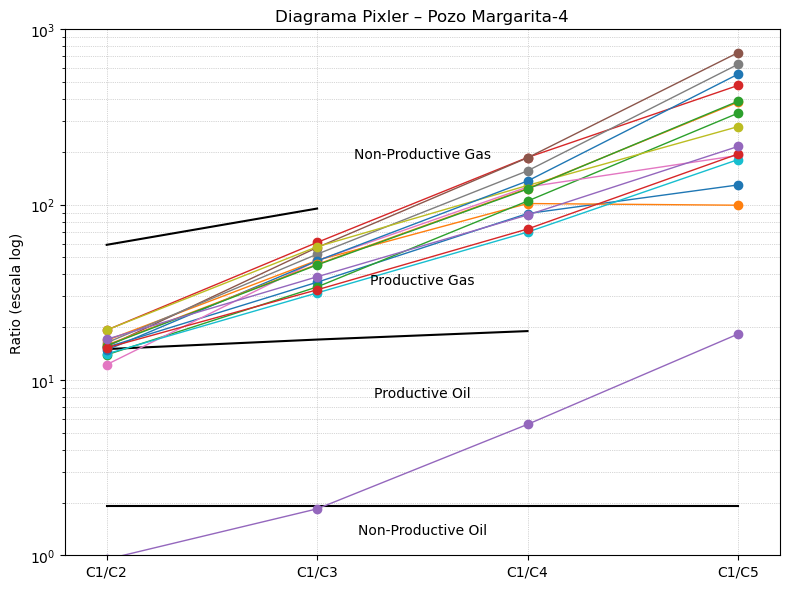

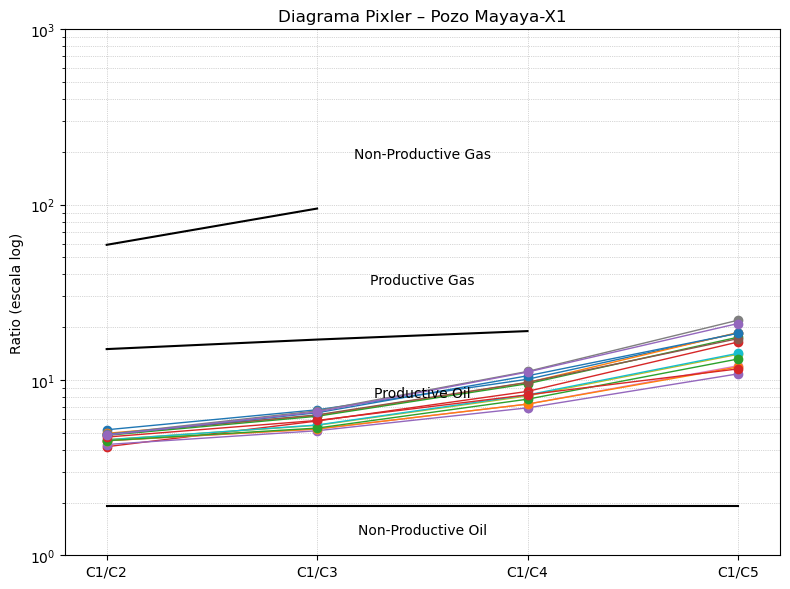

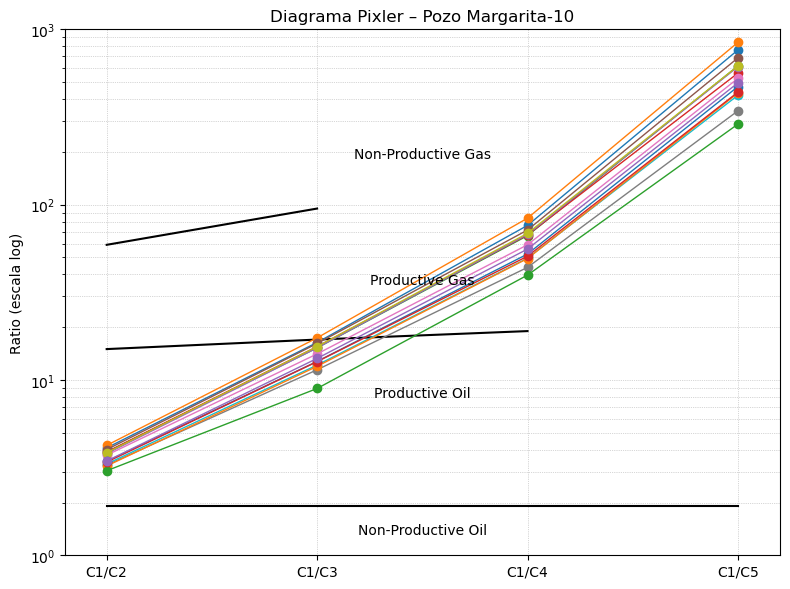

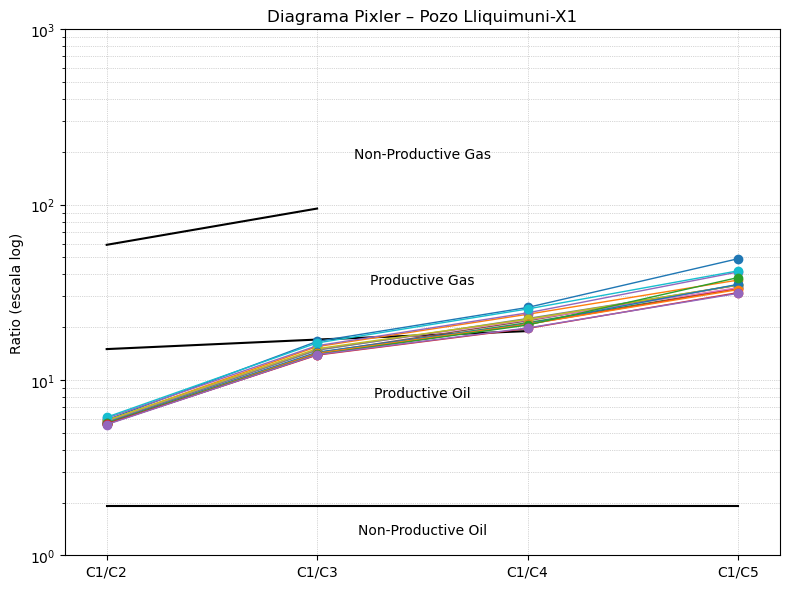

In [59]:
# 3.7.2 Diagrama de Pixler
import matplotlib.pyplot as plt

ratio_cols = ['C1/C2', 'C1/C3', 'C1/C4', 'C1/C5']
# Generar columna de ratios y índices
for pozo, top in tables_by_pozo.items():
    # Calcular ratios en el DataFrame top
    df_ratio = pd.DataFrame({
        'C1/C2': top['C1'] / top['C2'],
        'C1/C3': top['C1'] / top['C3'],
        'C1/C4': top['C1'] / (top['iC4'] + top['nC4']),
        'C1/C5': top['C1'] / (top['iC5'] + top['nC5'] + 1e-6)
    })
    x = np.arange(len(ratio_cols))

    # Umbrales (valores por ratio)
    thr_npo_po = np.array([1.9, 1.9, 1.9, 1.9])
    thr_po_pg  = np.array([15.0, 17.0, 19.0, np.nan])
    thr_pg_npg = np.array([59.0, 95.0, np.nan, np.nan])

    fig, ax = plt.subplots(figsize=(8, 6))
    # Líneas de umbral en negro
    ax.plot(x, thr_npo_po, color='black', linewidth=1.5)
    ax.plot(x[~np.isnan(thr_po_pg)], thr_po_pg[~np.isnan(thr_po_pg)], color='black', linewidth=1.5)
    ax.plot(x[~np.isnan(thr_pg_npg)], thr_pg_npg[~np.isnan(thr_pg_npg)], color='black', linewidth=1.5)

    # Curvas de cada muestra
    for idx in df_ratio.index:
        ax.plot(x, df_ratio.loc[idx, ratio_cols].values, marker='o', linewidth=1)

    # Etiquetas de zonas
    mid_x = 1.5
    ax.text(mid_x, thr_npo_po[0] * 0.8, 'Non-Productive Oil', ha='center', va='top')
    ax.text(mid_x, (thr_npo_po[0] + thr_po_pg[0]) / 2, 'Productive Oil', ha='center', va='center')
    ax.text(mid_x, (thr_po_pg[0] + thr_pg_npg[0]) / 2, 'Productive Gas', ha='center', va='center')
    ax.text(mid_x, thr_pg_npg[0] * 3, 'Non-Productive Gas', ha='center', va='bottom')

    # Configuración final
    ax.set_xticks(x)
    ax.set_xticklabels(ratio_cols)
    ax.set_yscale('log')
    ax.set_ylim(1, 1000)
    ax.set_xlim(-0.2, len(ratio_cols) - 0.8)
    ax.set_ylabel('Ratio (escala log)')
    ax.set_title(f'Diagrama Pixler – Pozo {pozo}')
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)

    plt.tight_layout()
    plt.show()

In [60]:
# RATIOS DE LAS 15 MUESTRAS (ANEXOS)
# Cálculo de ratios para cada pozo
df_ratio_tables: Dict[str, pd.DataFrame] = {}
for pozo, top in tables_by_pozo.items():
    df_r = pd.DataFrame({
        'Muestra': top['Muestra'],
        'C1/C2': top['C1']/top['C2'],
        'C1/C3': top['C1']/top['C3'],
        'C1/C4': top['C1']/(top['iC4']+top['nC4']),
        'C1/C5': top['C1']/(top['iC5']+top['nC5']+1e-6)
    })
    df_ratio_tables[pozo] = df_r

# Impresión en Markdown
for pozo, df_r in df_ratio_tables.items():
    print(f"## Ratios de las 15 muestras – Pozo {pozo}\n")
    print(df_r.to_markdown(index=False))

## Ratios de las 15 muestras – Pozo Margarita-4

|   Muestra |     C1/C2 |    C1/C3 |     C1/C4 |    C1/C5 |
|----------:|----------:|---------:|----------:|---------:|
|         1 | 15.3737   | 36.0947  |  88.9667  | 129.507  |
|         2 | 16.8154   | 48.1207  | 101.475   |  99.2696 |
|         3 | 13.9158   | 33.9275  | 104.818   | 332.289  |
|         4 | 19.2454   | 60.8752  | 185.735   | 478.37   |
|         5 |  0.948625 |  1.83999 |   5.57999 |  18.2636 |
|         6 | 15.4951   | 56.9514  | 185.092   | 735.622  |
|         7 | 12.2328   | 47.9603  | 126.031   | 190.802  |
|         8 | 16.3022   | 52.1747  | 155.916   | 631.019  |
|         9 | 19.2634   | 57.5358  | 128.667   | 278.484  |
|        10 | 14.079    | 31.365   |  69.7177  | 180.58   |
|        11 | 14.8088   | 47.7649  | 136.377   | 554.43   |
|        12 | 15.8198   | 45.6414  | 123.625   | 383.575  |
|        13 | 15.6997   | 45.295   | 122.687   | 388.65   |
|        14 | 15.2472   | 32.6802  |  72.599   | 19

# 3.8.	Desarrollo e implementación de modelos predictivos

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [66]:
# 3.8.1 Preparación de los datos
# Extraer las 15 muestras top de cada pozo
tables_by_pozo = get_top15_cromatography_samples(df)

# Calcular ratios para cada pozo
feature_cols = ['C1/C2','C1/C3','C1/C4','C1/C5']
df_ratio_tables = {
    pozo: pd.DataFrame({
        'C1/C2': df15['C1'] / df15['C2'],
        'C1/C3': df15['C1'] / df15['C3'],
        'C1/C4': df15['C1'] / (df15['iC4'] + df15['nC4']),
        'C1/C5': df15['C1'] / (df15['iC5'] + df15['nC5'] + 1e-6)
    })
    for pozo, df15 in tables_by_pozo.items()
}

# Definir pares de entrenamiento y prueba
pairs = [
    ('Margarita-4',  'Margarita-10'),
    ('Lliquimuni-X1','Mayaya-X1')
]

# Umbrales del diagrama Pixler
thr_npo_po = np.array([1.9, 1.9, 1.9, 1.9])
thr_po_pg  = np.array([15.0, 17.0, 19.0, np.nan])
thr_pg_npg = np.array([59.0, 95.0, np.nan, np.nan])
x = np.arange(len(feature_cols))

def pixler_plot(pred_curve, real_curve, title):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(x, thr_npo_po, 'k-', lw=1.5)
    ax.plot(x[~np.isnan(thr_po_pg)], thr_po_pg[~np.isnan(thr_po_pg)], 'k-', lw=1.5)
    ax.plot(x[~np.isnan(thr_pg_npg)], thr_pg_npg[~np.isnan(thr_pg_npg)], 'k-', lw=1.5)
    ax.plot(x, pred_curve, 'x--', label='Predicha')
    ax.plot(x, real_curve, 'o-', label='Real')
    for xi, yi in zip(x, pred_curve):
        ax.text(xi, yi, f"{yi:.2f}", ha='center', va='bottom', fontsize=8)
    for xi, yi in zip(x, real_curve):
        ax.text(xi, yi, f"{yi:.2f}", ha='center', va='top', fontsize=8)
    mid = 1.5
    ax.text(mid, thr_npo_po[0]*0.8,              'Non-Prod Oil', ha='center', va='top')
    ax.text(mid, (thr_npo_po[0]+thr_po_pg[0])/2, 'Prod Oil',      ha='center', va='center')
    ax.text(mid, (thr_po_pg[0]+thr_pg_npg[0])/2, 'Prod Gas',      ha='center', va='center')
    ax.text(mid, thr_pg_npg[0]*3,               'Non-Prod Gas', ha='center', va='bottom')
    ax.set_xticks(x); ax.set_xticklabels(feature_cols)
    ax.set_yscale('log'); ax.set_ylim(1,1000); ax.set_xlim(-0.2, len(x)-0.8)
    ax.set_ylabel('Ratio (log)'); ax.set_title(title)
    ax.legend(); ax.grid(True, which='both', linestyle=':', linewidth=0.5)
    plt.tight_layout(); plt.show()


RF Margarita-4→Margarita-10 | MSE=7723.461, MAE=61.450, R²=-348.326
RF Lliquimuni-X1→Mayaya-X1 | MSE=260.809, MAE=13.125, R²=-127.617

>>> Random Forest <<<


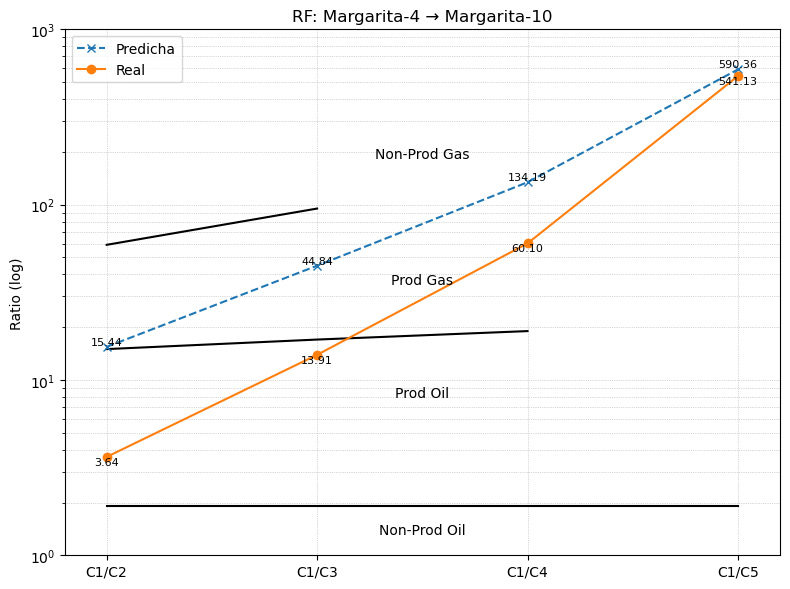


Tabla de valores de ratios (media sobre muestras):
         Predicho        Real
Ratio                        
C1/C2   15.443831    3.640104
C1/C3   44.844373   13.910880
C1/C4  134.191915   60.101301
C1/C5  590.359036  541.125090


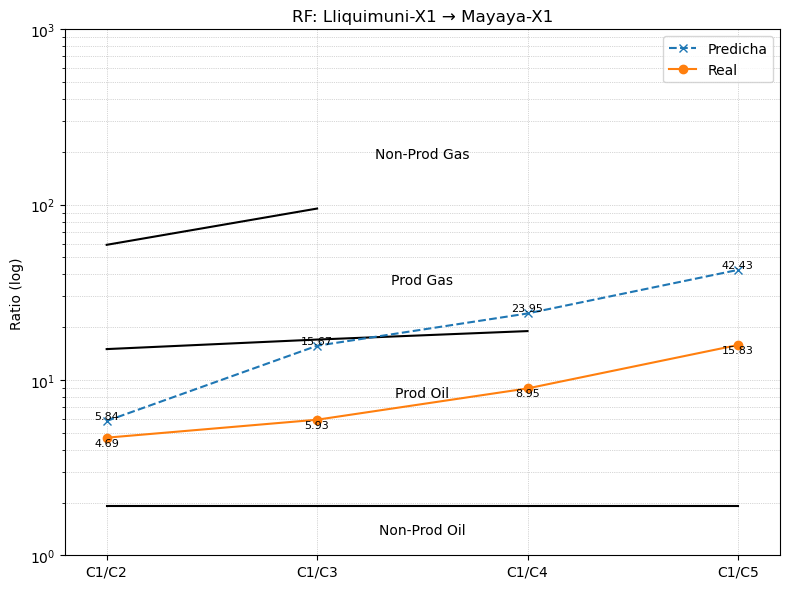


Tabla de valores de ratios (media sobre muestras):
        Predicho       Real
Ratio                      
C1/C2   5.837367   4.685341
C1/C3  15.672872   5.932886
C1/C4  23.949097   8.948250
C1/C5  42.433239  15.825620


In [68]:
# 3.8.2 Random Forest

model_rf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, random_state=42)
)
# 3.8.2.1 Evaluación
scaler = StandardScaler()
for tr, te in [('Margarita-4','Margarita-10'), ('Lliquimuni-X1','Mayaya-X1')]:
    X_tr = tables_by_pozo[tr][['Depth (m)','TGAS']]
    X_te = tables_by_pozo[te][['Depth (m)','TGAS']]
    y_tr = df_ratio_tables[tr];  y_te = df_ratio_tables[te]

    X_tr_s = scaler.fit_transform(X_tr)
    X_te_s = scaler.transform(X_te)

    y_pred = model_rf.fit(X_tr_s, y_tr).predict(X_te_s)

    mse = mean_squared_error(y_te, y_pred)
    mae = mean_absolute_error(y_te, y_pred)
    r2  = r2_score(y_te, y_pred)
    print(f"RF {tr}→{te} | MSE={mse:.3f}, MAE={mae:.3f}, R²={r2:.3f}")
# 3.8.2.2 Predicción

print("\n>>> Random Forest <<<")
for tr, te in pairs:
    df_tr = tables_by_pozo[tr]
    X_tr = df_tr[['Depth (m)', 'TGAS']].values
    y_tr = df_ratio_tables[tr].values
    df_te = tables_by_pozo[te]
    X_te = df_te[['Depth (m)', 'TGAS']].values
    y_te = df_ratio_tables[te].values

    scaler = StandardScaler().fit(X_tr)
    X_tr_s = scaler.transform(X_tr)
    X_te_s = scaler.transform(X_te)

    model_rf.fit(X_tr_s, y_tr)
    y_pred = model_rf.predict(X_te_s)

    pred_curve = y_pred.mean(axis=0)
    real_curve = y_te.mean(axis=0)

    pixler_plot(pred_curve, real_curve, f"RF: {tr} → {te}")

    # --- Tabla comparativa de ratios ---
    df_table = pd.DataFrame({
        'Predicho': pred_curve,
        'Real'    : real_curve
    }, index=feature_cols)
    df_table.index.name = 'Ratio'

    print("\nTabla de valores de ratios (media sobre muestras):")
    print(df_table)

RF Margarita-4→Margarita-10 | MSE=7723.461, MAE=61.450, R²=-348.326
RF Lliquimuni-X1→Mayaya-X1 | MSE=260.809, MAE=13.125, R²=-127.617

>>> XGBoost <<<


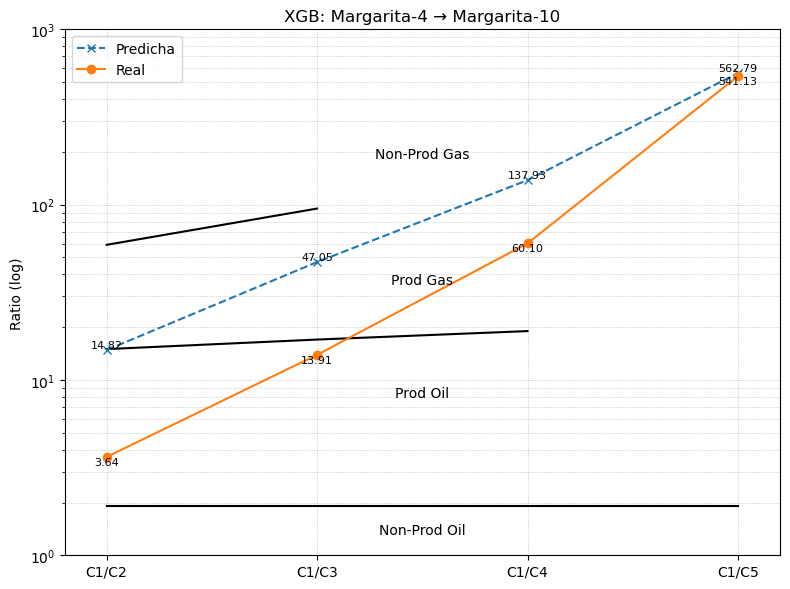


Tabla de valores de ratios (media sobre muestras):
         Predicho        Real
Ratio                        
C1/C2   14.821045    3.640104
C1/C3   47.046501   13.910880
C1/C4  137.930573   60.101301
C1/C5  562.787170  541.125090


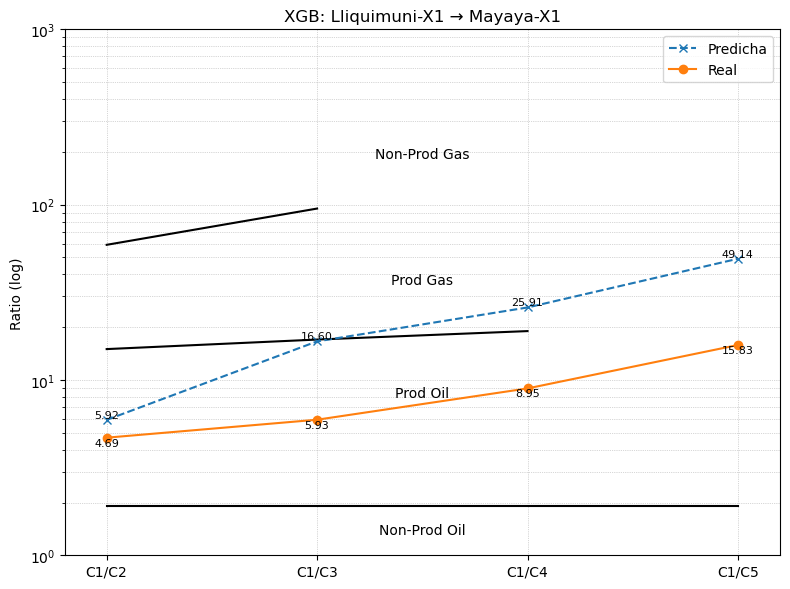


Tabla de valores de ratios (media sobre muestras):
        Predicho       Real
Ratio                      
C1/C2   5.921153   4.685341
C1/C3  16.597654   5.932886
C1/C4  25.909178   8.948250
C1/C5  49.137527  15.825620


In [69]:
# 3.8.3 XGBoost

model_xgb = MultiOutputRegressor(
    XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
)
# 3.8.3.1 Evaluación
scaler = StandardScaler()
for tr, te in [('Margarita-4','Margarita-10'), ('Lliquimuni-X1','Mayaya-X1')]:
    X_tr = tables_by_pozo[tr][['Depth (m)','TGAS']]
    X_te = tables_by_pozo[te][['Depth (m)','TGAS']]
    y_tr = df_ratio_tables[tr];  y_te = df_ratio_tables[te]

    X_tr_s = scaler.fit_transform(X_tr)
    X_te_s = scaler.transform(X_te)

    y_pred = model_rf.fit(X_tr_s, y_tr).predict(X_te_s)

    mse = mean_squared_error(y_te, y_pred)
    mae = mean_absolute_error(y_te, y_pred)
    r2  = r2_score(y_te, y_pred)
    print(f"RF {tr}→{te} | MSE={mse:.3f}, MAE={mae:.3f}, R²={r2:.3f}")

# 3.8.3.2 Predicción

print("\n>>> XGBoost <<<")
for tr, te in pairs:
    df_tr = tables_by_pozo[tr]
    X_tr = df_tr[['Depth (m)', 'TGAS']].values
    y_tr = df_ratio_tables[tr].values
    df_te = tables_by_pozo[te]
    X_te = df_te[['Depth (m)', 'TGAS']].values
    y_te = df_ratio_tables[te].values

    scaler = StandardScaler().fit(X_tr)
    X_tr_s = scaler.transform(X_tr)
    X_te_s = scaler.transform(X_te)

    model_xgb.fit(X_tr_s, y_tr)
    y_pred = model_xgb.predict(X_te_s)

    pred_curve = y_pred.mean(axis=0)
    real_curve = y_te.mean(axis=0)

    pixler_plot(pred_curve, real_curve, f"XGB: {tr} → {te}")
    # --- Tabla comparativa de ratios ---
    df_table = pd.DataFrame({
        'Predicho': pred_curve,
        'Real'    : real_curve
    }, index=feature_cols)
    df_table.index.name = 'Ratio'

    print("\nTabla de valores de ratios (media sobre muestras):")
    print(df_table)

RF Margarita-4→Margarita-10 | MSE=7723.461, MAE=61.450, R²=-348.326
RF Lliquimuni-X1→Mayaya-X1 | MSE=260.809, MAE=13.125, R²=-127.617

>>> SVR (RBF) <<<


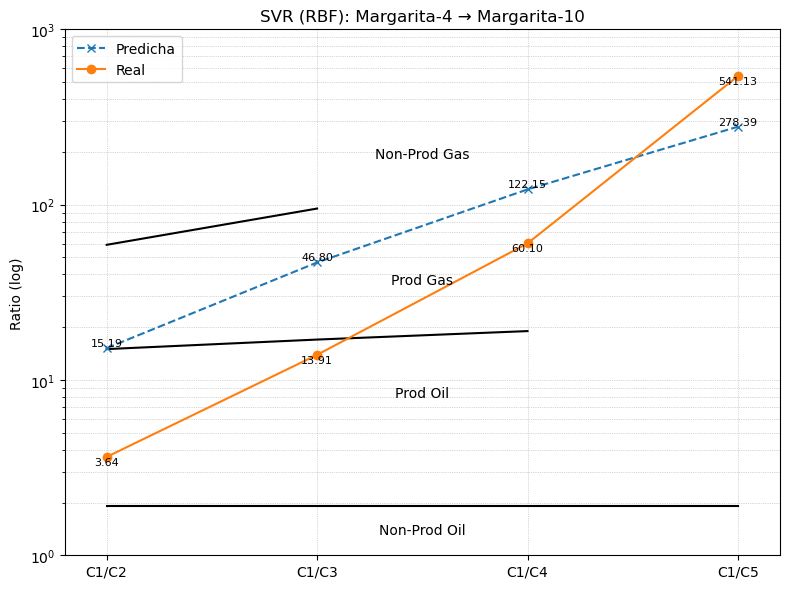


Tabla de valores de ratios (media sobre muestras):
         Predicho        Real
Ratio                        
C1/C2   15.192725    3.640104
C1/C3   46.795149   13.910880
C1/C4  122.147719   60.101301
C1/C5  278.391008  541.125090


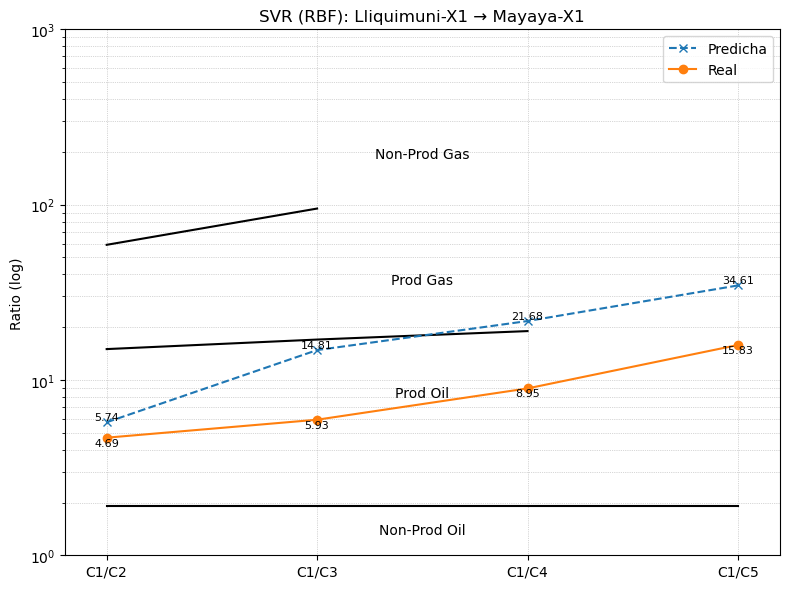


Tabla de valores de ratios (media sobre muestras):
        Predicho       Real
Ratio                      
C1/C2   5.736868   4.685341
C1/C3  14.806117   5.932886
C1/C4  21.682009   8.948250
C1/C5  34.606138  15.825620


In [70]:
# 3.8.4 Support Vector Regression (SVR con kernel RBF)

model_svr = MultiOutputRegressor(SVR(kernel='rbf', C=1.0, epsilon=0.1))

# 3.8.4.1 Evaluación
scaler = StandardScaler()
for tr, te in [('Margarita-4','Margarita-10'), ('Lliquimuni-X1','Mayaya-X1')]:
    X_tr = tables_by_pozo[tr][['Depth (m)','TGAS']]
    X_te = tables_by_pozo[te][['Depth (m)','TGAS']]
    y_tr = df_ratio_tables[tr];  y_te = df_ratio_tables[te]

    X_tr_s = scaler.fit_transform(X_tr)
    X_te_s = scaler.transform(X_te)

    y_pred = model_rf.fit(X_tr_s, y_tr).predict(X_te_s)

    mse = mean_squared_error(y_te, y_pred)
    mae = mean_absolute_error(y_te, y_pred)
    r2  = r2_score(y_te, y_pred)
    print(f"RF {tr}→{te} | MSE={mse:.3f}, MAE={mae:.3f}, R²={r2:.3f}")

# 3.8.4.2 Predicción
print("\n>>> SVR (RBF) <<<")
for tr, te in pairs:
    df_tr = tables_by_pozo[tr]; df_te = tables_by_pozo[te]
    X_tr = df_tr[['Depth (m)', 'TGAS']].values;  y_tr = df_ratio_tables[tr].values
    X_te = df_te[['Depth (m)', 'TGAS']].values;  y_te = df_ratio_tables[te].values

    scaler = StandardScaler().fit(X_tr)
    X_tr_s, X_te_s = scaler.transform(X_tr), scaler.transform(X_te)

    model_svr.fit(X_tr_s, y_tr)
    y_pred = model_svr.predict(X_te_s)

    pred_curve, real_curve = y_pred.mean(axis=0), y_te.mean(axis=0)
    pixler_plot(pred_curve, real_curve, f"SVR (RBF): {tr} → {te}")
   
    # --- Tabla comparativa de ratios ---
    df_table = pd.DataFrame({
        'Predicho': pred_curve,
        'Real'    : real_curve
    }, index=feature_cols)
    df_table.index.name = 'Ratio'

    print("\nTabla de valores de ratios (media sobre muestras):")
    print(df_table)

# 3.9 ANALISIS COMPARATIVO

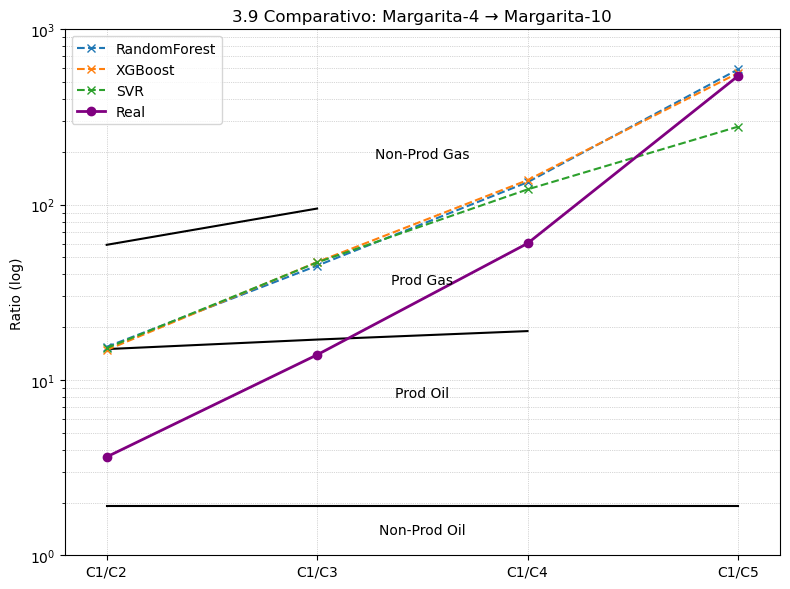

       RandomForest     XGBoost         SVR        Real
Ratio                                                  
C1/C2     15.443831   14.821045   15.192725    3.640104
C1/C3     44.844373   47.046501   46.795149   13.910880
C1/C4    134.191915  137.930573  122.147719   60.101301
C1/C5    590.359036  562.787170  278.391008  541.125090


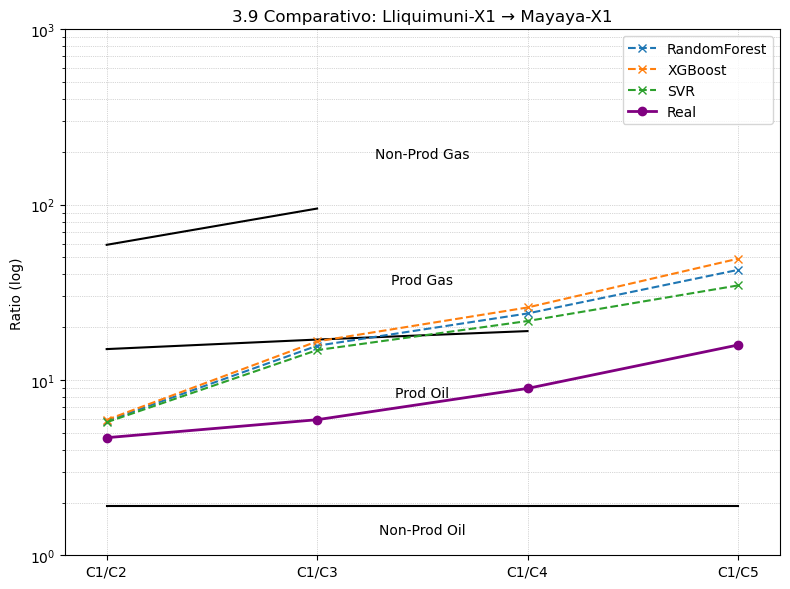

       RandomForest    XGBoost        SVR       Real
Ratio                                               
C1/C2      5.837367   5.921153   5.736868   4.685341
C1/C3     15.672872  16.597654  14.806117   5.932886
C1/C4     23.949097  25.909178  21.682009   8.948250
C1/C5     42.433239  49.137527  34.606138  15.825620


In [73]:

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Definición de todos los modelos a comparar
models_all = {
    'RandomForest': MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)),
    'XGBoost'     : MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)),
    'SVR'         : MultiOutputRegressor(SVR(kernel='rbf', C=1.0, epsilon=0.1))
}

# Función de plot comparativo
def pixler_compare_plot(curves_dict, real_curve, title):
    fig, ax = plt.subplots(figsize=(8,6))
    # Umbrales
    ax.plot(x, thr_npo_po, 'k-', lw=1.5)
    ax.plot(x[~np.isnan(thr_po_pg)], thr_po_pg[~np.isnan(thr_po_pg)], 'k-', lw=1.5)
    ax.plot(x[~np.isnan(thr_pg_npg)], thr_pg_npg[~np.isnan(thr_pg_npg)], 'k-', lw=1.5)
    # Curvas predichas
    for name, curve in curves_dict.items():
        ax.plot(x, curve, marker='x', linestyle='--', label=name)
    # Curva real
    ax.plot(x, real_curve, marker='o', color='purple', lw=2, label='Real')
    # Etiquetas de zonas
    mid = 1.5
    ax.text(mid, thr_npo_po[0]*0.8,              'Non-Prod Oil', ha='center', va='top')
    ax.text(mid, (thr_npo_po[0]+thr_po_pg[0])/2, 'Prod Oil',      ha='center', va='center')
    ax.text(mid, (thr_po_pg[0]+thr_pg_npg[0])/2, 'Prod Gas',      ha='center', va='center')
    ax.text(mid, thr_pg_npg[0]*3,               'Non-Prod Gas', ha='center', va='bottom')
    # Formato final
    ax.set_xticks(x); ax.set_xticklabels(feature_cols)
    ax.set_yscale('log'); ax.set_ylim(1,1000); ax.set_xlim(-0.2, len(x)-0.8)
    ax.set_ylabel('Ratio (log)'); ax.set_title(title)
    ax.legend(); ax.grid(True, which='both', linestyle=':', linewidth=0.5)
    plt.tight_layout(); plt.show()

# Ejecución del análisis comparativo
for tr, te in pairs:
    df_tr, df_te = tables_by_pozo[tr], tables_by_pozo[te]
    X_tr = df_tr[['Depth (m)', 'TGAS']].values;  y_tr = df_ratio_tables[tr].values
    X_te = df_te[['Depth (m)', 'TGAS']].values;  y_te = df_ratio_tables[te].values

    scaler = StandardScaler().fit(X_tr)
    X_tr_s, X_te_s = scaler.transform(X_tr), scaler.transform(X_te)

    pred_curves = {}
    for name, model in models_all.items():
        model.fit(X_tr_s, y_tr)
        y_pred = model.predict(X_te_s)
        pred_curves[name] = y_pred.mean(axis=0)

    real_curve = y_te.mean(axis=0)

    pixler_compare_plot(
        pred_curves,
        real_curve,
        f"3.9 Comparativo: {tr} → {te}"
    )
    # Ratios
    df_results = pd.DataFrame(pred_curves, index=feature_cols)
    df_results['Real'] = real_curve
    df_results.index.name = 'Ratio'
    print(df_results)

## Tablas comparativas

In [76]:
# Evaluación de los rendimientos
pairs = [
    ('Margarita-4',   'Margarita-10'),
    ('Lliquimuni-X1', 'Mayaya-X1')
]
models = {
    'RF':  MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)),
    'XGB': MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42,
                                             objective='reg:squarederror')),
    'SVR': MultiOutputRegressor(SVR())
}
feature_cols = ['C1/C2','C1/C3','C1/C4','C1/C5']

# 2) Calcular métricas
metrics = { m:{f"{tr}→{te}":{} for tr,te in pairs} for m in models }
scaler = StandardScaler()

for name, model in models.items():
    for tr, te in pairs:
        X_tr = tables_by_pozo[tr][['Depth (m)', 'TGAS']].values
        y_tr = df_ratio_tables[tr][feature_cols].values
        X_te = tables_by_pozo[te][['Depth (m)', 'TGAS']].values
        y_te = df_ratio_tables[te][feature_cols].values

        X_tr_s = scaler.fit_transform(X_tr)
        X_te_s = scaler.transform(X_te)
        y_pred = model.fit(X_tr_s, y_tr).predict(X_te_s)

        metrics[name][f"{tr}→{te}"]['MSE'] = mean_squared_error(y_te, y_pred)
        metrics[name][f"{tr}→{te}"]['MAE'] = mean_absolute_error(y_te, y_pred)
        metrics[name][f"{tr}→{te}"]['R2']  = r2_score(y_te, y_pred)

# 3) Construir df_comp
scenarios   = list(metrics[next(iter(models))].keys())
model_names = list(models.keys())
metrics_names = ['MSE','MAE','R2']
cols = pd.MultiIndex.from_product([model_names, metrics_names], names=['Modelo','Métrica'])
df_comp = pd.DataFrame(index=scenarios, columns=cols)

for m in model_names:
    for sc in scenarios:
        for met in metrics_names:
            df_comp.loc[sc, (m, met)] = metrics[m][sc][met]
df_comp = df_comp.astype(float).round(3)

# 4) Estilizar la tabla
styled = (
    df_comp.style
    .format("{:.3f}")
    .set_table_styles([
        {
            'selector': 'th',
            'props': [
                ('background-color', '#e0e0e0'),
                ('color', 'black'),
                ('font-weight', 'bold'),
                ('border-bottom', '1px solid #aaa'),
                ('padding', '4px 8px')
            ]
        },
        {
            'selector': 'td',
            'props': [
                ('border-bottom', '1px solid #ddd'),
                ('padding', '4px 8px'),
                ('text-align', 'right')
            ]
        },
        {
            'selector': 'tr:nth-child(even) td',
            'props': [
                ('background-color', '#f7f7f7')
            ]
        }
    ])
    .set_caption("Tabla X. Métricas de rendimiento por modelo y escenario")
)
styled

In [77]:
models = {
    'Random Forest': MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)),
    'XGBoost':       MultiOutputRegressor(XGBRegressor(n_estimators=100,
                                                       random_state=42,
                                                       objective='reg:squarederror')),
    'SVR':           MultiOutputRegressor(SVR())
}

pairs = [
    ('Margarita-4',   'Margarita-10'),
    ('Lliquimuni-X1', 'Mayaya-X1')
]

feature_cols = ['C1/C2', 'C1/C3', 'C1/C4', 'C1/C5']
scaler = StandardScaler()

# 3) Calcular las curvas “Reales” y “Predichas” promedio
tables = {}
for tr, te in pairs:
    scenario = f"{tr} → {te}"
    real_curve = df_ratio_tables[te][feature_cols].mean(axis=0).values
    tables[scenario] = {'Real': real_curve}
    
    # Preparo X de entrenamiento y prueba
    X_tr = tables_by_pozo[tr][['Depth (m)', 'TGAS']].values
    X_te = tables_by_pozo[te][['Depth (m)', 'TGAS']].values
    scaler.fit(X_tr)
    X_tr_s = scaler.transform(X_tr)
    X_te_s = scaler.transform(X_te)

    # Entreno y predigo para cada modelo
    for name, model in models.items():
        y_tr   = df_ratio_tables[tr][feature_cols].values
        y_pred = model.fit(X_tr_s, y_tr).predict(X_te_s)
        tables[scenario][name] = y_pred.mean(axis=0)

# ——————————————————————————————————————————————
# 4) Construir y estilizar cada tabla por escenario
for scenario, data in tables.items():
    df_tab = pd.DataFrame(data, index=feature_cols).round(3)
    styled = (
        df_tab
        .style
        .format("{:.3f}")
        .set_table_styles([
            {'selector': 'th', 'props': [
                ('background-color', '#e0e0e0'),
                ('color', 'black'),
                ('font-weight', 'bold'),
                ('padding', '4px 8px')]
            },
            {'selector': 'td', 'props': [
                ('border-bottom', '1px solid #ddd'),
                ('padding', '4px 8px'),
                ('text-align', 'right')]
            },
            {'selector': 'tr:nth-child(even) td', 'props': [
                ('background-color', '#f7f7f7')]
            }
        ])
        .set_caption(f"Tabla: Proyección de ratios – {scenario}")
    )
    display(styled)

,Real,Random Forest,XGBoost,SVR
C1/C2,3.640,15.444,14.821,15.193
C1/C3,13.911,44.844,47.046,46.795
C1/C4,60.101,134.192,137.931,122.148
C1/C5,541.125,590.359,562.787,278.391


,Real,Random Forest,XGBoost,SVR
C1/C2,4.685,5.837,5.921,5.737
C1/C3,5.933,15.673,16.598,14.806
C1/C4,8.948,23.949,25.909,21.682
C1/C5,15.826,42.433,49.138,34.606


# 4.6 ANALISIS Y EVALUACION DEL POTENCIAL PRODUCTIVO PARA LOS POZOS MARGARITA Y MAYAYA

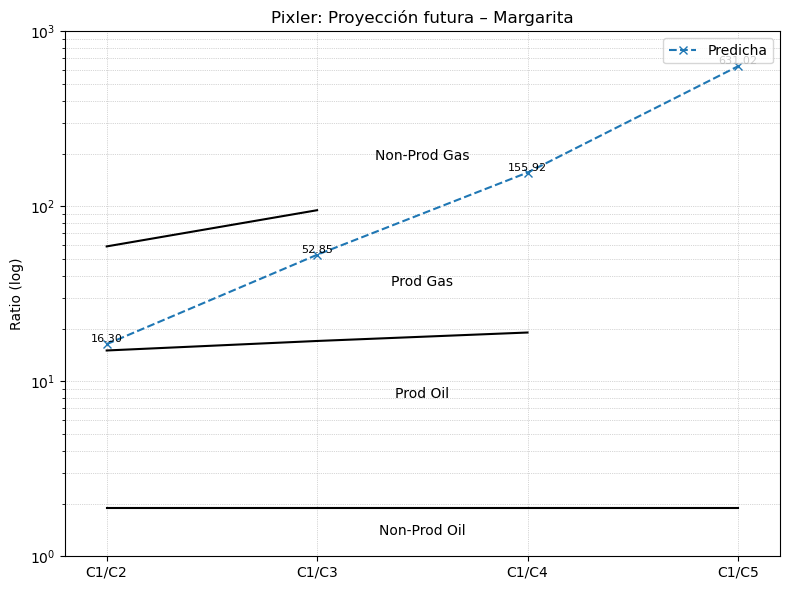

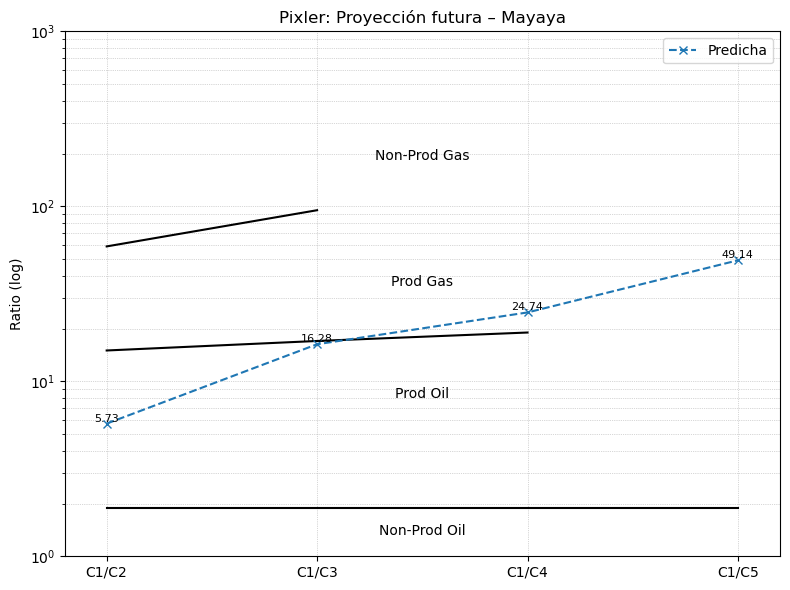

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

# 1) Función Pixler (acepta real_vec opcional)
def pixler_plot(pred_vec, real_vec, title, feature_cols):
    x = np.arange(len(feature_cols))
    thr_npo_po = np.array([1.9] * len(feature_cols))
    thr_po_pg  = np.array([15.0, 17.0, 19.0, np.nan])
    thr_pg_npg = np.array([59.0, 95.0, np.nan, np.nan])

    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(x, thr_npo_po, 'k-', lw=1.5)
    ax.plot(x[~np.isnan(thr_po_pg)],  thr_po_pg[~np.isnan(thr_po_pg)],  'k-', lw=1.5)
    ax.plot(x[~np.isnan(thr_pg_npg)], thr_pg_npg[~np.isnan(thr_pg_npg)], 'k-', lw=1.5)
    ax.plot(x, pred_vec, 'x--', label='Predicha')
    if real_vec is not None:
        ax.plot(x, real_vec, 'o-', label='Real (const.)')

    for xi, yi in zip(x, pred_vec):
        ax.text(xi, yi, f"{yi:.2f}", ha='center', va='bottom', fontsize=8)
    if real_vec is not None:
        for xi, yi in zip(x, real_vec):
            ax.text(xi, yi, f"{yi:.2f}", ha='center', va='top', fontsize=8)

    mid = x.mean()
    ax.text(mid, thr_npo_po[0]*0.8,               'Non-Prod Oil', ha='center', va='top')
    ax.text(mid, (thr_npo_po[0]+thr_po_pg[0])/2,  'Prod Oil',     ha='center', va='center')
    ax.text(mid, (thr_po_pg[0]+thr_pg_npg[0])/2,  'Prod Gas',     ha='center', va='center')
    ax.text(mid, thr_pg_npg[0]*3,                 'Non-Prod Gas', ha='center', va='bottom')

    ax.set_xticks(x)
    ax.set_xticklabels(feature_cols)
    ax.set_yscale('log')
    ax.set_ylim(1, 1e3)
    ax.set_xlim(-0.2, len(x)-0.8)
    ax.set_ylabel('Ratio (log)')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)
    plt.tight_layout()
    plt.show()


# 2) Parámetros de las perforaciones futuras
future_wells = {
    'Margarita': {
        'depth': 2600,      # profundidad estimada (m)
        'tgas':  110000,    # TGAS estimado (ppm)
        'train': 'Margarita-4'
    },
    'Mayaya': {
        'depth': 2400,      # profundidad estimada (m)
        'tgas':  130000,    # TGAS estimado (ppm)
        'train': 'Lliquimuni-X1'
    }
}

feature_cols = ['C1/C2','C1/C3','C1/C4','C1/C5']
scaler = StandardScaler()

# 3) Para cada pozo futuro: entrenar XGBoost y proyectar
for name, params in future_wells.items():
    # Entrenamiento histórico
    X_hist = tables_by_pozo[params['train']][['Depth (m)','TGAS']].values
    y_hist = df_ratio_tables[params['train']][feature_cols].values
    X_hist_s = scaler.fit_transform(X_hist)

    xgb = MultiOutputRegressor(
        XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
    ).fit(X_hist_s, y_hist)

    # Nueva perforación
    X_new   = np.array([[params['depth'], params['tgas']]])
    X_new_s = scaler.transform(X_new)
    ratios_pred = xgb.predict(X_new_s).flatten()

    # (Opcional) Curva “real” de referencia: media del pozo de prueba
    # real_curve = df_ratio_tables[params['train'].replace('4','10')][feature_cols].mean(axis=0).values
    real_curve = None

    # 4) Diagrama Pixler prospectivo
    pixler_plot(
        ratios_pred,
        real_curve,
        f"Pixler: Proyección futura – {name}",
        feature_cols
    )
